In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Turn csv into dataframe
parkinsons_df = pd.read_csv('parkinsons.csv')
print(parkinsons_df.columns)

# Preprocess data by checking for duplicates and missings
print(f'Duplicates: {parkinsons_df.duplicated().sum()}')
print(f'Missings: \n{parkinsons_df.isnull().sum()}')

# Since both duplicates and missings are 0, no need for adjustment

Index(['age', 'sex', 'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE', 'target'],
      dtype='object')
Duplicates: 0
Missings: 
age              0
sex              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
target           0
dtype: int64


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Opti

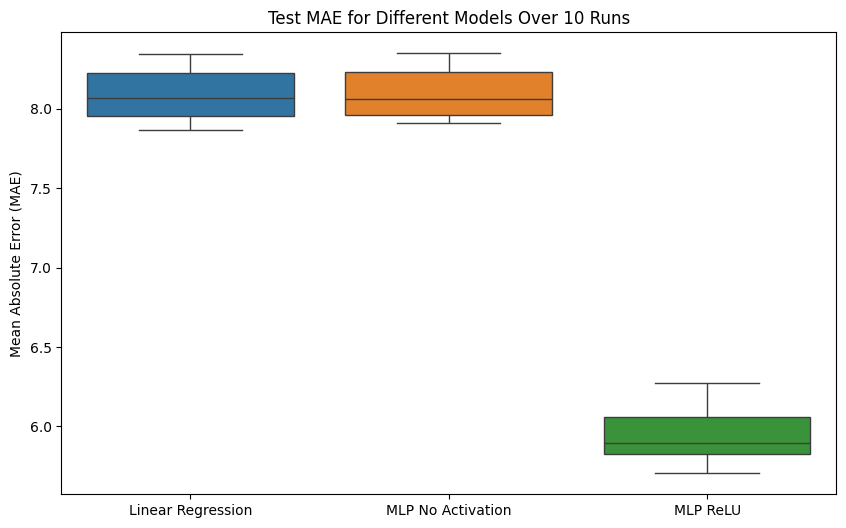

In [9]:
# Obtain features and labels
X = parkinsons_df.drop(columns='target')
y = parkinsons_df['target']

# Initialize lists to store MAE results
mae_linear = []
mae_mlp_no_activation = []
mae_mlp_relu = []

# Loop over 10 different train-test splits with random_state=i
for i in range(1, 11):
    # Split the data (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # 1 - Linear Regression
    lr_model = LinearRegression() # Declare
    lr_model.fit(X_train, y_train) # Fit
    y_pred_lr = lr_model.predict(X_test) # Predict
    mae_linear.append(mean_absolute_error(y_test, y_pred_lr)) # Error list
    
    # 2 - MLP Regressor with 2 hidden layers, 10 neurons, no activation f()
    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0) # Declare
    mlp_no_activation.fit(X_train, y_train) # Fit
    y_pred_mlp_no_activation = mlp_no_activation.predict(X_test) # Predict
    mae_mlp_no_activation.append(mean_absolute_error(y_test, y_pred_mlp_no_activation)) # Error list
    
    # 3 - MLP Regressor with 2 hidden layers, 10 neurons, ReLU activation f()
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0) # Declare
    mlp_relu.fit(X_train, y_train) # Fit
    y_pred_mlp_relu = mlp_relu.predict(X_test) # Predict
    mae_mlp_relu.append(mean_absolute_error(y_test, y_pred_mlp_relu)) # Error list


# We got the mae lists, now we can plot 'em 
mae_results_df = pd.DataFrame({
    'Linear Regression': mae_linear,
    'MLP No Activation': mae_mlp_no_activation,
    'MLP ReLU': mae_mlp_relu
})

# Create a boxplot of the test MAE for each model
plt.figure(figsize=(10, 6))
sns.boxplot(data=mae_results_df)
plt.title('Test MAE for Different Models Over 10 Runs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

The MLP with no activation function behaves similarly to Linear Regression, as both can only model linear relationships and thus fail to capture non-linear behavior in the data. For example, without activation functions, an MLP with two hidden layers essentially performs a linear transformation, reducing to a single linear equation. In contrast, incorporating an activation function, such as ReLU, allows the MLP to learn complex, non-linear patterns, significantly improving its predictive performance, as can be shown from the figure, with MLP ReLU outperforming the two first models by 25%.

Grid search results data frame columns: Index(['alpha', 'batch_size', 'learning_rate_init', 'MAE', 'Index'], dtype='object')
 Grid search results data frame:      alpha  batch_size  learning_rate_init       MAE  Index
0   0.0001          32               0.001  4.691999      1
1   0.0001          32               0.010  4.803027      2
2   0.0001          32               0.100  5.595615      3
3   0.0001          64               0.001  4.756185      4
4   0.0001          64               0.010  4.803530      5
5   0.0001          64               0.100  5.348101      6
6   0.0001         128               0.001  4.873907      7
7   0.0001         128               0.010  4.882213      8
8   0.0001         128               0.100  5.098597      9
9   0.0010          32               0.001  4.612882     10
10  0.0010          32               0.010  5.106154     11
11  0.0010          32               0.100  5.544898     12
12  0.0010          64               0.001  4.787284     13
13

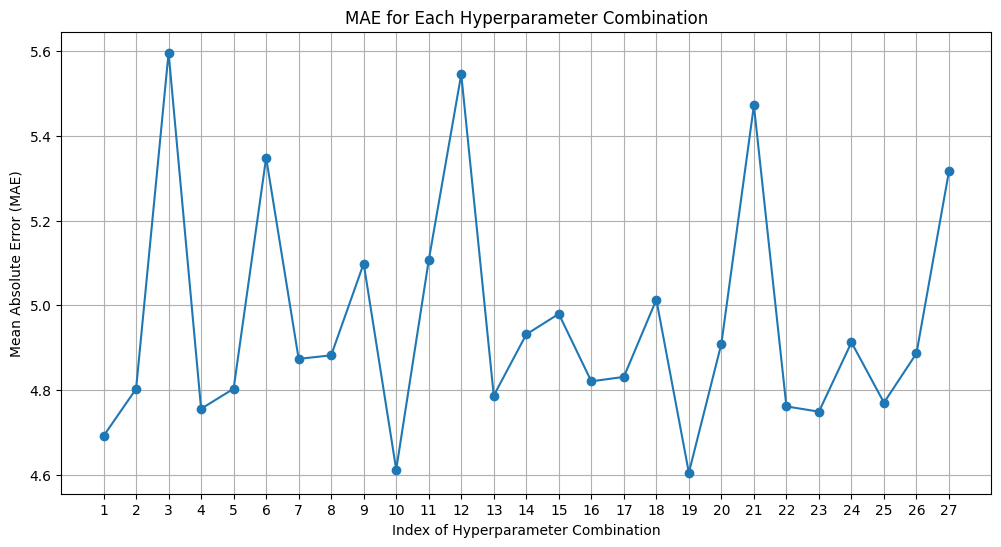

alpha                  0.010000
batch_size            32.000000
learning_rate_init     0.001000
MAE                    4.605472
Index                 19.000000
Name: 18, dtype: float64
Best Hyperparameters: 
 ALPHA: 0.01 
BATCH SIZE: 32.0
Learning rate: 0.001
Best Cross-Validated MAE: 4.605471514279751


In [26]:
# Declare neural network
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=0)

# Hyperparameter grid we will search on
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],  # Learning rate
    'batch_size': [32, 64, 128]  # Batch size
}

# Run grid search
grid_search = GridSearchCV(mlp, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract results for plotting and create a dataframe
results = grid_search.cv_results_
results_df = pd.DataFrame(results['params'])
results_df['MAE'] = -results['mean_test_score']  # Convert to positive MAE
results_df['Index'] = range(1, len(results_df) + 1) # Create an index for each combination

# Thus we get a dataframe with this format:
#['alpha', 'batch_size', 'learning_rate_init', 'MAE', 'Index']
#[ ...   ,   .. . . .  , . .. .. . .. . .. . ,  .. . , ... ..]
#[ ...   ,   .. . . .  , . .. .. . .. . .. . ,  .. . , ... ..]
# etc, to confirm: 
print(f'Grid search results data frame columns: {results_df.columns}\n Grid search results data frame: {results_df}')


# Reporting the best combination and its index
best_index = results_df['MAE'].idxmin()  # Row index of the minimum MAE in grid search results
best_combination = results_df.iloc[best_index]
print(best_combination)
print(f"Best Hyperparameters: \n ALPHA: {best_combination['alpha']} \nBATCH SIZE: {best_combination['batch_size']}\nLearning rate: {best_combination['learning_rate_init']}")
print(f"Best Cross-Validated MAE: {best_combination['MAE']}")

# Plotting MAE against the index of hyperparameter combinations index
plt.figure(figsize=(12, 6))
plt.plot(results_df['Index'], results_df['MAE'], marker='o')

plt.title('MAE for Each Hyperparameter Combination')
plt.xlabel('Index of Hyperparameter Combination')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(results_df['Index'])  # Show all indexes on x-axis
plt.grid()
plt.show()


